# K-means Clustering

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Data 

In [41]:
# cluster1 is centred at (1,1) and has standard deviation 0.2, and 40 points
cluster1 = np.random.randn(40,2)*0.2+np.array([[1,1]])

# cluster2 is centred at (2,1), and has standard deviation 0.2, and 40 points
cluster2 = np.random.randn(40,2)*0.2+np.array([[2,1]])

# cluster3 is centred at (1.5,2), and has standard deviation 0.2, and 40 points
cluster3 = np.random.randn(40,2)*0.2+np.array([[1.5,2]])

background = np.random.uniform(low=[0,0],high=[3,3],size=(30,2))

# Merge our different datasets into one array
points_array = np.concatenate([cluster1,cluster2,cluster3,background])

# We'll represent the points as a list of tuples
points = [tuple(p) for p in points_array]

## Step 1: Randomly initialize centroids

Given a list of N data points, and a value k, return a list of k randomly placed centroids

In [42]:
def initialise_centroids(data, k):
    """
    Place centroids randomly into range of data of arbitrary dimension.
    Takes a list of N data points.
    Returns a list of k centroids, each of which will be a tuple of the same
    dimensionality as the data points.
    """
    d = len(data[0])
    
    # Make the data into a numpy array
    arr = np.array(data)
    minvals = np.min(data,axis=0)
    maxvals = np.max(data,axis=0)
    centroids = np.random.uniform(low=minvals,high=maxvals,size=(k,d))
    
    # Return centroids as a list of tuples
    return [tuple(c) for c in centroids]

## Step 2: Assign points to centroids

Given a list of k centroids and a list of N points, return a list of N integers, where each integer should be a number from 0 to k-1, corresponding to the closest centroid for that point.

Use *euclidean_distance()*, a function to calculate euclidean distance between tuples representing points.

In [43]:
def euclidean_distance(a,b):
    """
    Assuming that a and b are each tuples representing points, 
    calculate the euclidean distance beween them.
    """
    return np.linalg.norm(np.array(a) - np.array(b))

In [44]:
def assign_points(centroids, data):
    """
    Assign each point to its closest centroid.
    Take in an array of shape (k,d) representing centroid coordinates,
    and an array of shape (N,d) representing data coordinates.
    Return a list or array of N values where each value is between 0 and k-1
    and represents the centroid that the data point has been assigned to.
    """
    closest_centroids = []

    for point in data:
        distances = []
        
        for centroid_position in centroids:
            dist = euclidean_distance(point,centroid_position)
            distances.append(dist)
        
        min_dist = min(distances)
        closest_centroid = distances.index(min_dist)
        closest_centroids.append(closest_centroid)
      
    return closest_centroids

## Step 3: Update centroid locations to cluster means 

Given a list of data points, the list of assignments to clusters, and k, return a list of centroids. 

Use *average_point()*, a function to get average of a list of points

In [45]:
def average_point(points):
    """
    Take in a list of points, where each point is a tuple.
    Return the average of the points.
    """
    return tuple(np.mean(np.array(points), axis=0))

In [46]:
def calculate_mean_centroids(data, assignments, k):
    """
    Take list of N data points (a list of tuples)  
    and a list of N centroid assignments, 
    and return a list of k centroids.
    """
    N = len(data)
    d = len(data[0])
    
    updated_centroids = []
    
    for cluster in range(k):
        points = [point for point, assignment in zip(data, assignments) if assignment == cluster]
        updated_centroids.append(average_point(points)) 
    
    return updated_centroids

## Test our function by assigning datapoints to their nearest randomly initialised centroid.

Use *plot_kmeans()*, a plotting function to visualize results 

In [47]:
def plot_kmeans(data, centroids, assignments, k):
    for cluster in range(k):
        cluster_points = [p for (p,assignment) in zip(data,assignments) 
                            if assignment==cluster]
        x_values = [x for (x,y) in cluster_points]
        y_values = [y for (x,y) in cluster_points]
        plt.scatter(x_values,y_values)
    centroid_x_values = [x for (x,y) in centroids]
    centroid_y_values = [y for (x,y) in centroids]
    plt.scatter(centroid_x_values,centroid_y_values,marker='x',s=80,c='k')
    plt.show()

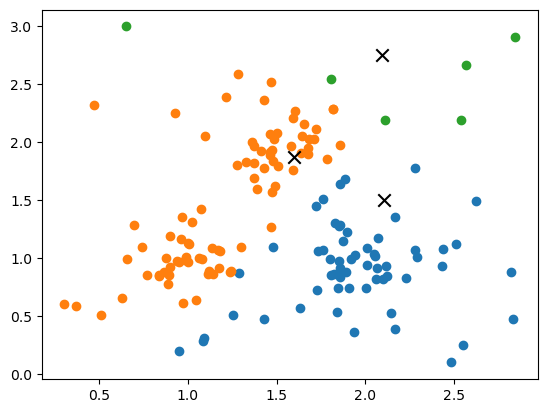

In [48]:
# Init centroids 
random_centroids = initialise_centroids(points, 3)

# Assign points to centroid
clusters = assign_points(random_centroids, points)

# Plot the clusters
plot_kmeans(points, random_centroids, clusters, 3)

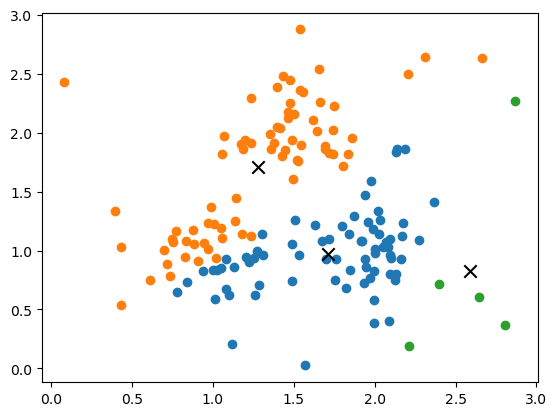

In [31]:
# Update centroid locations to mean point of each cluster:
updated_centroids = calculate_mean_centroids(points, clusters, 3)

# Plot the clusters with updated centroid locations 
# Note: We have not updated the cluster assignments yet, just the centroids!
plot_kmeans(points, updated_centroids, clusters, 3)

## Putting it all together into kmeans() function

Use *points_equal()*, a function which checks if two lists of points are equal 

In [49]:
def points_equal(centroids1, centroids2):
    """
    Given two lists of points, check that they are equal.
    Allow a floating-point error of epsilon along each dimension.
    """
    epsilon = 0.001
    return np.all(np.array(centroids1) - np.array(centroids2) < epsilon)

In [50]:
def kmeans(data, k):
    """
    Implement k-means clustering on a given set of points.
    data should be a list of N points, where each point is a tuple.
    Returns a tuple of (centroids, cluster_assignments), where 
    centroids is a list of centroid points, and each centroid is a tuple; and
    cluster_assignments a list of N numbers representing cluster assignments,
    where each number is between 0 and k-1.
    """
    
    N = len(data)
    d = len(data[0])
    centroids = initialise_centroids(data, k)
    cluster_assignments = assign_points(centroids, data)
    old_centroids = [(0,)*d]*k  # unlikely to be equal to centroids at start
    
    # Stopping condition used: "no change in centroid location"
    while not points_equal(centroids,old_centroids):
        old_centroids = centroids
        
        # Uncomment the following line to plot if you'd like to see what is happening at each step
        #plot_kmeans(data, centroids, assignments, k)
    
        cluster_assignments = assign_points(centroids, data)
        centroids = calculate_mean_centroids(data, cluster_assignments, k)
        
        # plot_kmeans(data, centroids, cluster_assignments, k)
        
    return (centroids, cluster_assignments)

## Test the kmeans function

List of centroid coordinates: 
[(1.586838358978979, 2.038333695076928), (0.9936891637858305, 0.904397519952938), (2.0603951409425525, 0.9003281096249247)]
List of cluster assignments: 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1]


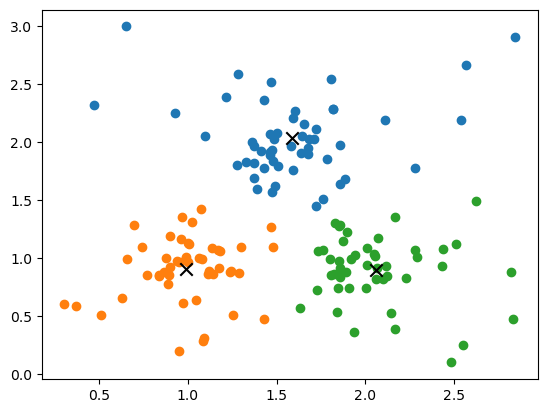

In [51]:
k = 3
centroids, assignments = kmeans(points, k)
print('List of centroid coordinates: ')
print(centroids)
print('List of cluster assignments: ')
print(assignments)

plot_kmeans(points, centroids, assignments, k)